#**Project Name - Traffic Accident Data Analysis**

In [17]:
import pandas as pd

# Load the three files to inspect the data structure
acc_file_path = '/content/drive/MyDrive/ACC_AUX.CSV'
per_file_path = '/content/drive/MyDrive/PER_AUX.CSV'
veh_file_path = '/content/drive/MyDrive/VEH_AUX.CSV'

In [18]:
# Reading the files
acc_data = pd.read_csv(acc_file_path)
per_data = pd.read_csv(per_file_path)
veh_data = pd.read_csv(veh_file_path)

# Display the first few rows of each dataset to understand their structure
acc_data_head = acc_data.head()
per_data_head = per_data.head()
veh_data_head = veh_data.head()

acc_data_head, per_data_head, veh_data_head

(   YEAR  STATE  ST_CASE  FATALS  A_CRAINJ  A_REGION  A_RU  A_INTER  A_RELRD  \
 0  2022      1    10001       1         1         4     1        2        1   
 1  2022      1    10002       2         1         4     1        2        1   
 2  2022      1    10003       1         1         4     1        2        4   
 3  2022      1    10004       1         1         4     1        1        4   
 4  2022      1    10005       1         1         4     2        1        2   
 
    A_INTSEC  ...  A_RD  A_HR  A_DIST  A_DROWSY  A_WRONGWAY  BIA  SPJ_INDIAN  \
 0         2  ...     2     2       2         2           2    0           0   
 1         2  ...     2     2       2         2           1    0           0   
 2         2  ...     1     2       2         2           2    0           0   
 3         2  ...     1     2       2         2           2    0           0   
 4         2  ...     1     1       2         2           2    0           0   
 
    INDIAN_RES  CENSUS_2020_TRACT_FI

In [19]:
acc_data.columns, per_data.columns, veh_data.columns

(Index(['YEAR', 'STATE', 'ST_CASE', 'FATALS', 'A_CRAINJ', 'A_REGION', 'A_RU',
        'A_INTER', 'A_RELRD', 'A_INTSEC', 'A_ROADFC', 'A_JUNC', 'A_MANCOL',
        'A_TOD', 'A_DOW', 'A_CT', 'A_WEATHER', 'A_LT', 'A_MC', 'A_SPCRA',
        'A_PED', 'A_PED_F', 'A_PEDAL', 'A_PEDAL_F', 'A_ROLL', 'A_POLPUR',
        'A_POSBAC', 'A_D15_19', 'A_D16_19', 'A_D15_20', 'A_D16_20', 'A_D65PLS',
        'A_D21_24', 'A_D16_24', 'A_RD', 'A_HR', 'A_DIST', 'A_DROWSY',
        'A_WRONGWAY', 'BIA', 'SPJ_INDIAN', 'INDIAN_RES',
        'CENSUS_2020_TRACT_FIPS', 'TRACT'],
       dtype='object'),
 Index(['A_AGE1', 'A_AGE2', 'A_AGE3', 'A_AGE4', 'A_AGE5', 'A_AGE6', 'A_AGE7',
        'A_AGE8', 'A_AGE9', 'STATE', 'ST_CASE', 'VEH_NO', 'PER_NO', 'YEAR',
        'A_PTYPE', 'A_RESTUSE', 'A_HELMUSE', 'A_ALCTES', 'A_HISP', 'A_RCAT',
        'A_HRACE', 'A_EJECT', 'A_PERINJ', 'A_LOC', 'A_DOA'],
       dtype='object'),
 Index(['YEAR', 'STATE', 'ST_CASE', 'VEH_NO', 'A_WRONGWAYDRV', 'A_DRDIS',
        'A_DRDRO', 'A_VRD', 'A_BO

In [20]:
# Data Preprocessing and Exploratory Data Analysis (EDA)

# 1. Check for missing values in each dataset
acc_missing = acc_data.isnull().sum()
per_missing = per_data.isnull().sum()
veh_missing = veh_data.isnull().sum()

# 2. Data types of each dataset to identify necessary conversions
acc_dtypes = acc_data.dtypes
per_dtypes = per_data.dtypes
veh_dtypes = veh_data.dtypes

# 3. Statistical summary of numeric columns
acc_description = acc_data.describe()
per_description = per_data.describe()
veh_description = veh_data.describe()

# Results: Missing values, Data types, and Summary statistics for numeric columns
acc_missing, per_missing, veh_missing, acc_dtypes, per_dtypes, veh_dtypes, acc_description, per_description, veh_description

(YEAR                        0
 STATE                       0
 ST_CASE                     0
 FATALS                      0
 A_CRAINJ                    0
 A_REGION                    0
 A_RU                        0
 A_INTER                     0
 A_RELRD                     0
 A_INTSEC                    0
 A_ROADFC                    0
 A_JUNC                      0
 A_MANCOL                    0
 A_TOD                       0
 A_DOW                       0
 A_CT                        0
 A_WEATHER                   0
 A_LT                        0
 A_MC                        0
 A_SPCRA                     0
 A_PED                       0
 A_PED_F                     0
 A_PEDAL                     0
 A_PEDAL_F                   0
 A_ROLL                      0
 A_POLPUR                    0
 A_POSBAC                    0
 A_D15_19                    0
 A_D16_19                    0
 A_D15_20                    0
 A_D16_20                    0
 A_D65PLS                    0
 A_D21_2

**Missing Data:**

ACC_AUX: Minimal missing data, except for the column CENSUS_2020_TRACT_FIPS, which has 257 missing entries.
PER_AUX and VEH_AUX: No missing data.

**Data Types:**

The majority of the columns are integers, indicating that many fields might represent categorical values (such as road conditions, driver behaviors, etc.) that will need decoding for further analysis.

**Statistical Summary:**

The distributions of key variables like fatalities, age, wrong-way driving, and restraint use show variability that can provide insights into accident risk factors.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the CENSUS_2020_TRACT_FIPS column since it's missing substantial data
acc_data_cleaned = acc_data.drop(columns=["CENSUS_2020_TRACT_FIPS"])

<ipython-input-22-956036ff4f6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=acc_data_cleaned, x='STATE', palette='Blues')


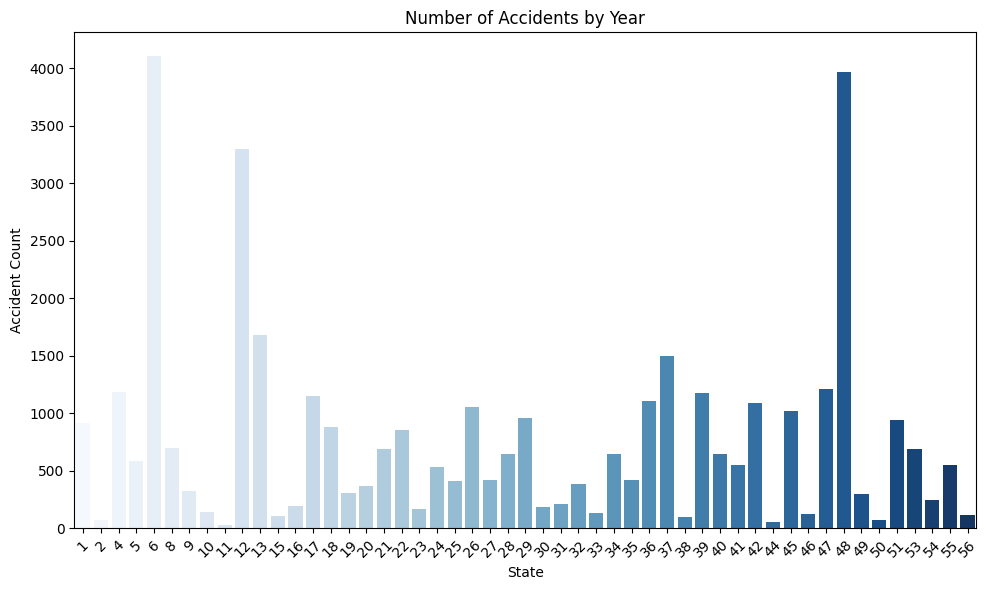

In [22]:
# 1. Accident With respect to states (YEAR vs. FATALS)
plt.figure(figsize=(10, 6))
sns.countplot(data=acc_data_cleaned, x='STATE', palette='Blues')
plt.title('Number of Accidents by Year')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()

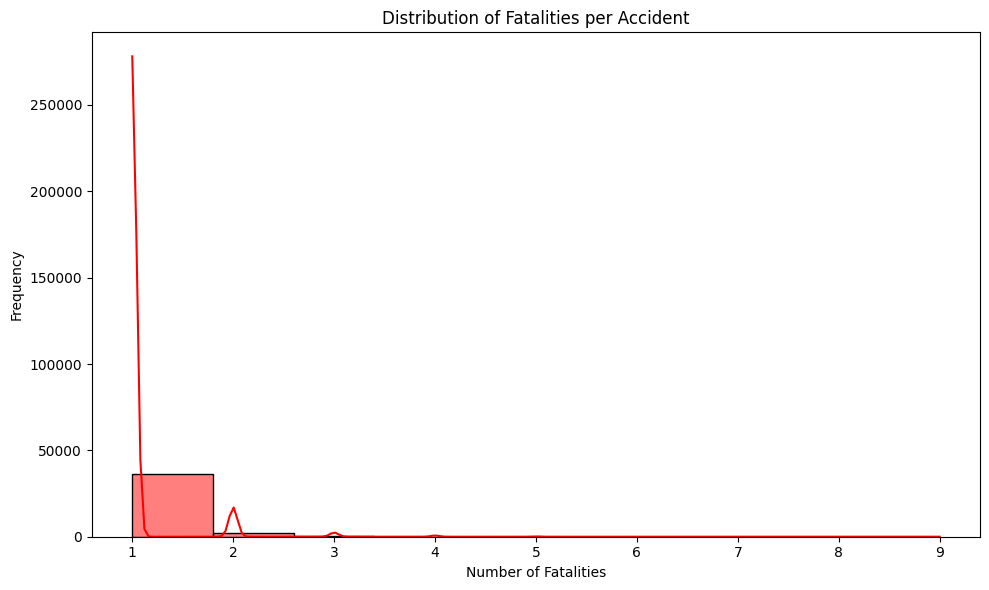

In [23]:
# 2. Distribution of fatalities per accident
plt.figure(figsize=(10, 6))
sns.histplot(acc_data_cleaned['FATALS'], kde=True, bins=10, color='red')
plt.title('Distribution of Fatalities per Accident')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

Most accidents result in 1 or 2 fatalities, with very few causing a higher number of deaths.

<ipython-input-24-bebd435d6e06>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=acc_data_cleaned, x='A_WEATHER', palette='Set2')


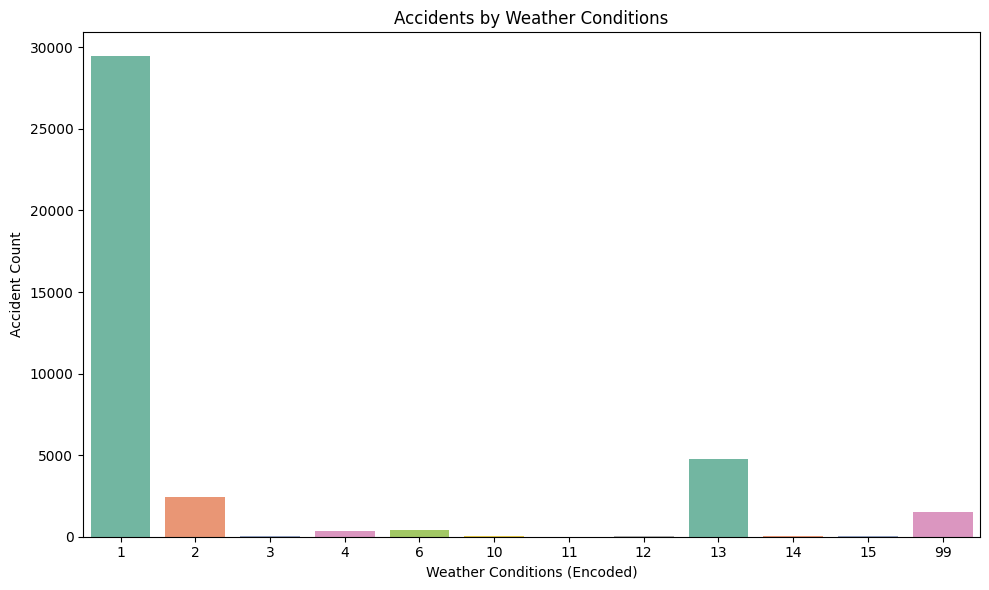

In [24]:
# Correlation between weather conditions (A_WEATHER) and accidents
# Create a count plot to see the distribution of accidents under different weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=acc_data_cleaned, x='A_WEATHER', palette='Set2')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions (Encoded)')
plt.ylabel('Accident Count')
plt.tight_layout()

<ipython-input-25-f04a27a5ca72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=acc_data_cleaned, x='A_REGION', palette='coolwarm')


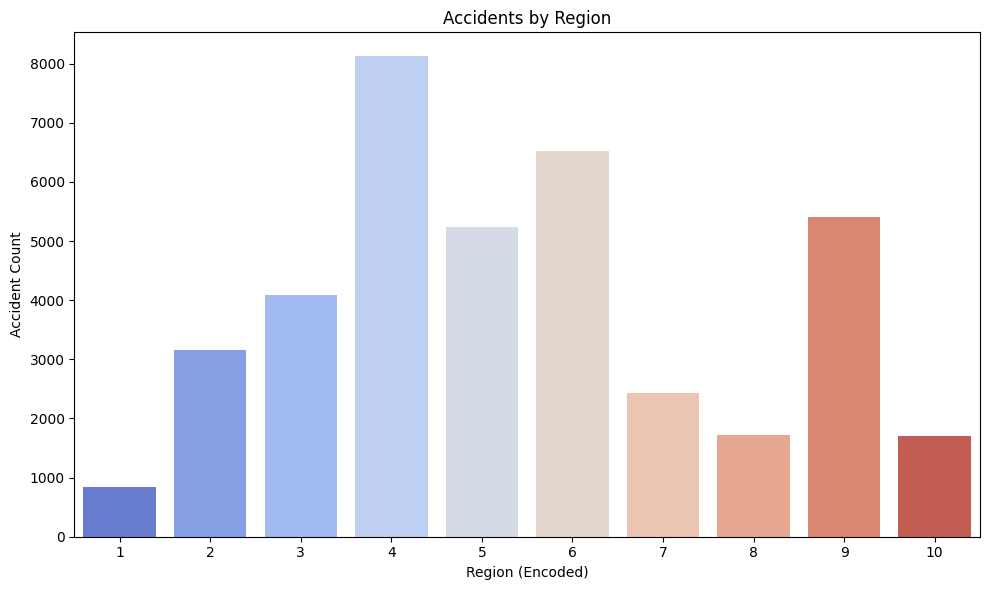

In [25]:
# Exploring potential accident hotspots (A_REGION)
plt.figure(figsize=(10, 6))
sns.countplot(data=acc_data_cleaned, x='A_REGION', palette='coolwarm')
plt.title('Accidents by Region')
plt.xlabel('Region (Encoded)')
plt.ylabel('Accident Count')
plt.tight_layout()

plt.show()

<ipython-input-26-ce316b017901>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=acc_data_cleaned, x='A_TOD', palette='magma')


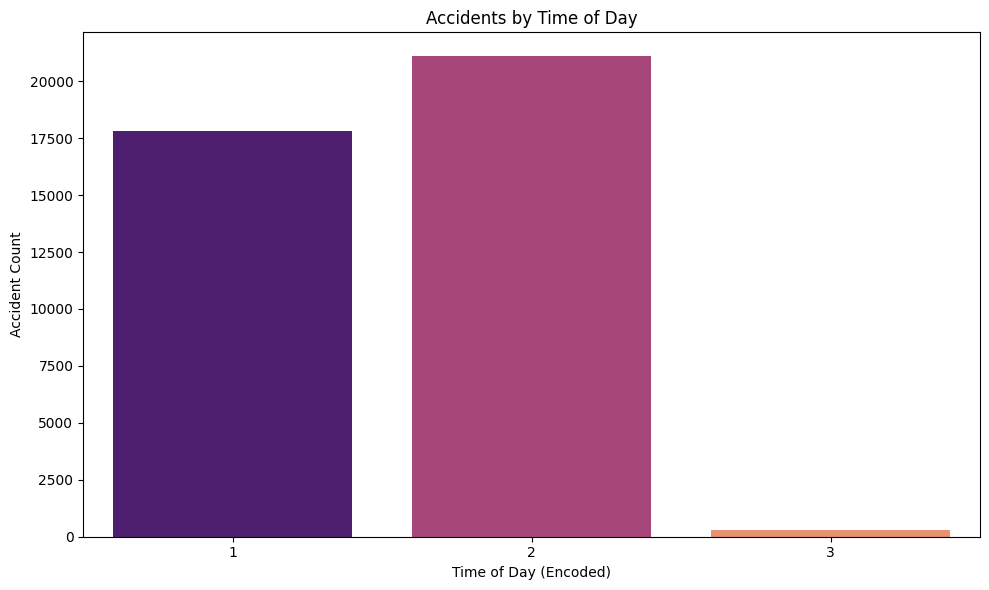

In [26]:
#Accident Occurrences by Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(data=acc_data_cleaned, x='A_TOD', palette='magma')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day (Encoded)')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

<ipython-input-27-29178fd3d038>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=per_data, x='A_AGE1', y='A_PERINJ', palette='coolwarm')


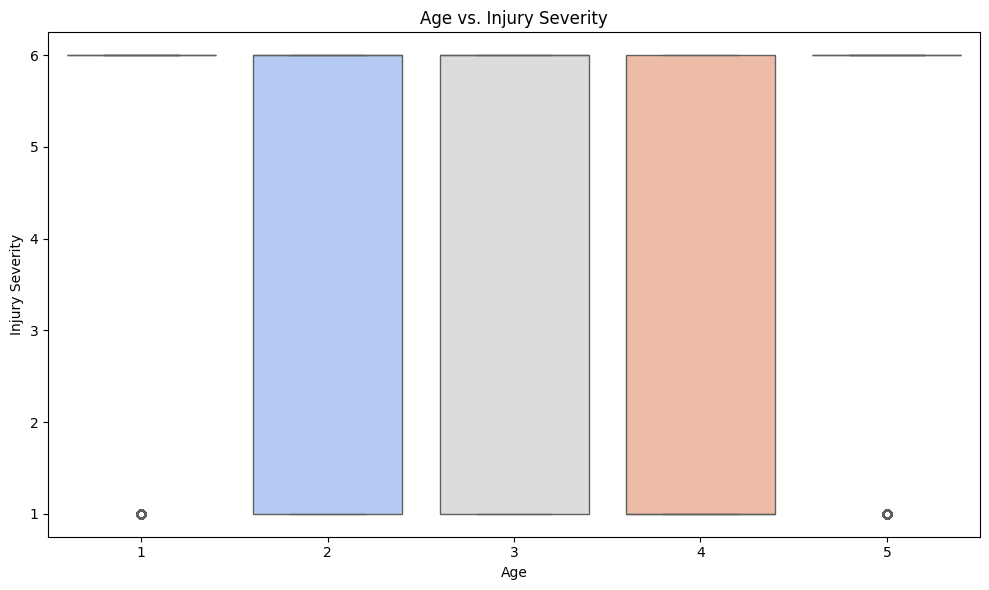

In [27]:
#Correlation between Age and Fatalities
plt.figure(figsize=(10, 6))
sns.boxplot(data=per_data, x='A_AGE1', y='A_PERINJ', palette='coolwarm')
plt.title('Age vs. Injury Severity')
plt.xlabel('Age')
plt.ylabel('Injury Severity')
plt.tight_layout()
plt.show()

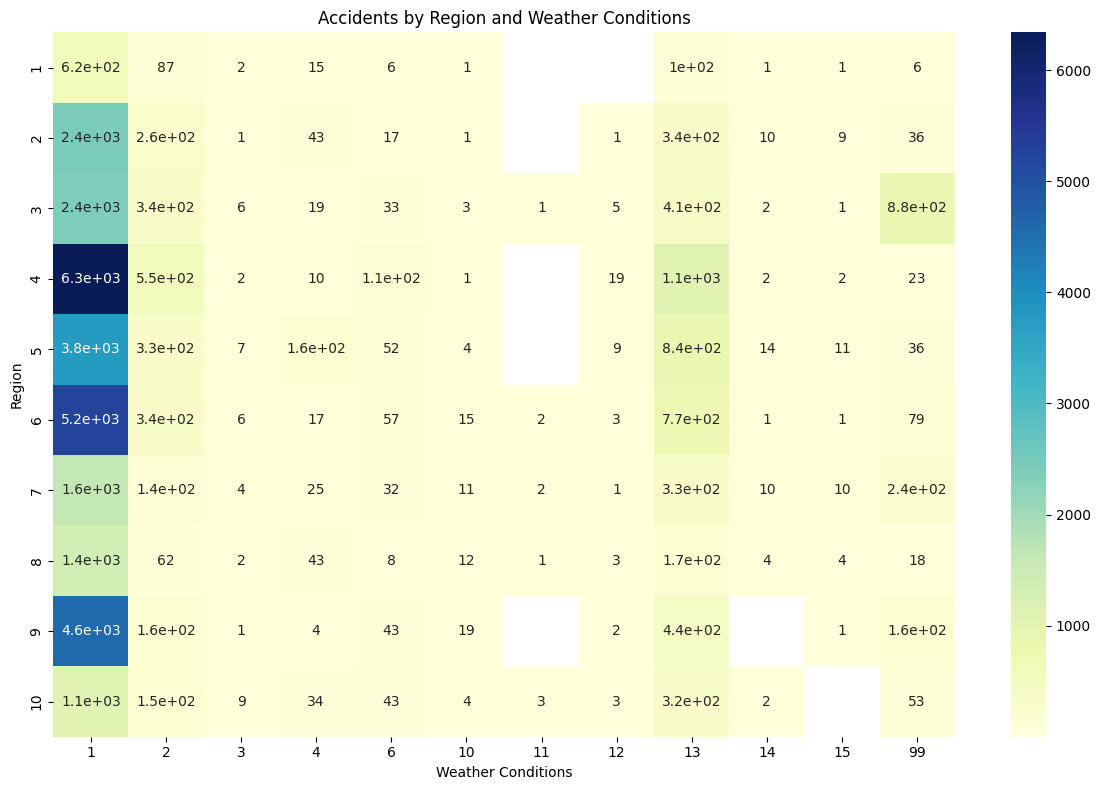

In [28]:
#Heatmap of Accidents by Region and Weather Conditions
plt.figure(figsize=(12, 8))
pivot_table = pd.pivot_table(acc_data_cleaned, values='ST_CASE', index='A_REGION', columns='A_WEATHER', aggfunc='count')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('Accidents by Region and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

**Recommendations:**

Data-Driven Policy Making: Governments and road safety agencies should utilize data analytics to continuously monitor traffic accidents and assess the effectiveness of safety measures.

Public Safety Campaigns: Increase awareness of the impact of weather, time of day, and driver fatigue on accident risks. Leverage media campaigns to highlight these factors and promote safe driving practices.

Technological Investments: Invest in smart road technologies like variable speed limit signs and weather sensors that can adapt to changing road conditions and automatically inform drivers of hazardous conditions.

Driver Education and Legislation: Periodically update driver education programs to reflect current accident data, focusing on high-risk behaviors and conditions. Strengthen laws related to distracted driving, speeding, and impaired driving.

